In [1]:
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from arftools import *
from matplotlib import cm
from sklearn.svm import SVC

### SVM et Grid Search

#### Données aritificielle 2D

In [2]:
trainx,trainy =  gen_arti(nbex=1000,data_type=0,epsilon=1)
testx,testy =  gen_arti(nbex=1000,data_type=0,epsilon=1)

In [18]:
def plot_frontiere_proba(data, f, step=20):
    grid, x, y = make_grid(data=data, step=step)
    plt.contourf(x, y, f(grid).reshape(x.shape), 255)

##### Test noyau linéaire

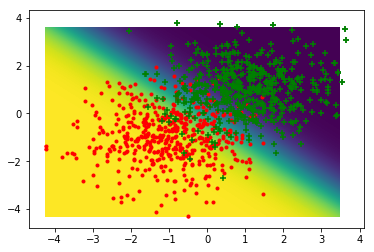

points dont les coefs sont non nuls [[-1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -0.72111177 -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1

In [17]:
svm = SVC(probability = True, kernel='linear')

svm.fit(trainx, trainy)

plot_frontiere_proba(testx, lambda x : svm.predict_proba(x)[:,0], step=50)
plot_data(testx,testy)
plt.show()

print("points dont les coefs sont non nuls", svm.dual_coef_)
print("nombre de points dont les coefs sont non nuls", len(svm.dual_coef_[0]))

print("train", svm.score(trainx, trainy))
print("test", svm.score(testx, testy))

Remarque : les points qui ont des coefs nuls n'apparaissent pas, ils sont bien classés. Les points qui ont pour coefs C*y (ici -1 ou 1) sont possiblement mal classés (soit hors de la marge soit dans la marge). Les points qui ont un autre coefficients sont sur la marge.

##### Test noyau linéaire C=5

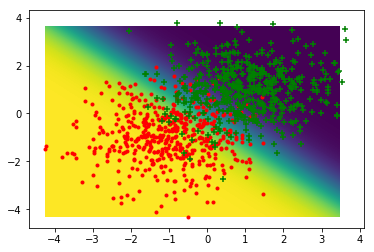

train 0.909
test 0.919


In [19]:
svm = SVC(probability = True, kernel='linear', C=5)

svm.fit(trainx, trainy)

plot_frontiere_proba(testx, lambda x : svm.predict_proba(x)[:,0], step=50)
plot_data(testx,testy)
plt.show()

print("train", svm.score(trainx, trainy))
print("test", svm.score(testx, testy))

##### Test linéaire C=0.0001

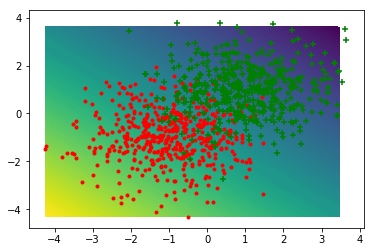

train 0.909
test 0.917


In [20]:
svm = SVC(probability = True, kernel='linear', C=0.0001)

svm.fit(trainx, trainy)

plot_frontiere_proba(testx, lambda x : svm.predict_proba(x)[:,0], step=50)
plot_data(testx,testy)
plt.show()

print("train", svm.score(trainx, trainy))
print("test", svm.score(testx, testy))

#### Test poynomiale

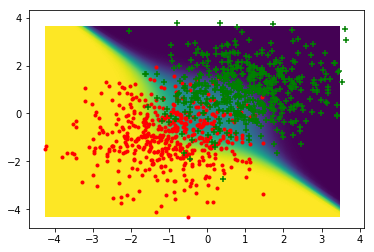

points dont les coefs sont non nuls [[-1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -0.66307904 -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -0.25969988 -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1

In [21]:
svm = SVC(probability = True, kernel='poly')

svm.fit(trainx, trainy)

plot_frontiere_proba(testx, lambda x : svm.predict_proba(x)[:,0], step=50)
plot_data(testx,testy)
plt.show()

print("points dont les coefs sont non nuls", svm.dual_coef_)
print("nombre de points dont les coefs sont non nuls", len(svm.dual_coef_[0]))
print("train", svm.score(trainx, trainy))
print("test", svm.score(testx, testy))

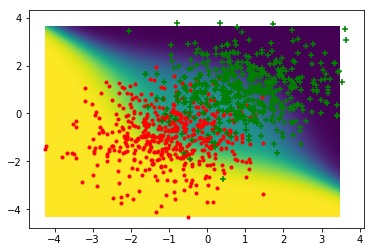

train 0.904
test 0.913


In [22]:
svm = SVC(probability = True, kernel='poly',C=0.0001)

svm.fit(trainx, trainy)

plot_frontiere_proba(testx, lambda x : svm.predict_proba(x)[:,0], step=50)
plot_data(testx,testy)
plt.show()

print("train", svm.score(trainx, trainy))
print("test", svm.score(testx, testy))

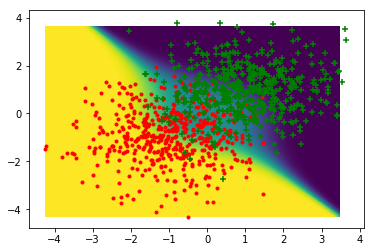

train 0.893
test 0.906


In [23]:
svm = SVC(probability = True, kernel='poly',C=50)

svm.fit(trainx, trainy)

plot_frontiere_proba(testx, lambda x : svm.predict_proba(x)[:,0], step=50)
plot_data(testx,testy)
plt.show()

print("train", svm.score(trainx, trainy))
print("test", svm.score(testx, testy))

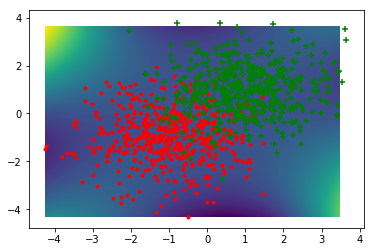

train 0.522
test 0.501


In [24]:
svm = SVC(probability = True, kernel='poly', degree=4)

svm.fit(trainx, trainy)

plot_frontiere_proba(testx, lambda x : svm.predict_proba(x)[:,0], step=50)
plot_data(testx,testy)
plt.show()

print("train", svm.score(trainx, trainy))
print("test", svm.score(testx, testy))

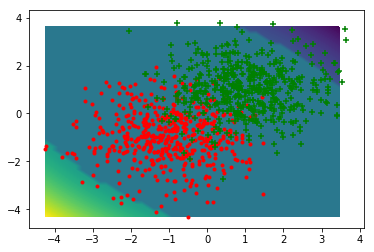

train 0.761
test 0.778


In [25]:
svm = SVC(probability = True, kernel='poly',gamma=0.01)

svm.fit(trainx, trainy)

plot_frontiere_proba(testx, lambda x : svm.predict_proba(x)[:,0], step=50)
plot_data(testx,testy)
plt.show()

print("train", svm.score(trainx, trainy))
print("test", svm.score(testx, testy))

#### Test gaussien

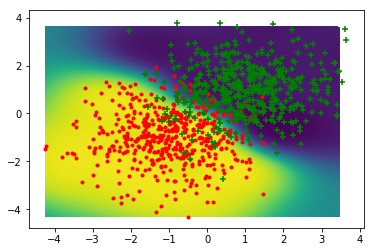

points dont les coefs sont non nuls [[-1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -0.52132908 -0.43889013 -0.43962889 -1.         -0.57339042
  -1.         -1.         -1.         -1.         -1.         -0.88937266
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -0.30160378 -1.         -1.         -1.         -1.         -1.         -1.
  -0.58819118 -1.         -1.         -1.         -1.         -0.05200671
  -1.         -1.         -1.         -1.         -0.22158218 -1.         -1.
  -1.         -1.         -0.46185449 -0.7057741  -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -0.42458264 -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1

In [26]:
svm = SVC(probability = True, kernel='rbf')

svm.fit(trainx, trainy)

plot_frontiere_proba(testx, lambda x : svm.predict_proba(x)[:,0], step=50)
plot_data(testx,testy)
plt.show()

print("points dont les coefs sont non nuls", svm.dual_coef_)
print("nombre de points dont les coefs sont non nuls", len(svm.dual_coef_[0]))

print("train", svm.score(trainx, trainy))
print("test", svm.score(testx, testy))

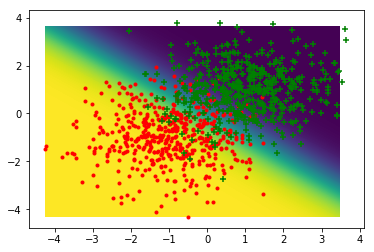

train 0.909
test 0.914


In [27]:
svm = SVC(probability = True, kernel='rbf', gamma=0.001)

svm.fit(trainx, trainy)

plot_frontiere_proba(testx, lambda x : svm.predict_proba(x)[:,0], step=50)
plot_data(testx,testy)
plt.show()

print("train", svm.score(trainx, trainy))
print("test", svm.score(testx, testy))

On voit que l'option gamma a diminué le sur-apprentissage.

Concernant le nombre de points qui ont des coefficients non nul, on observe que leur nombre varie en fonction des noyau utilisé, mais qu'il est plus faible dans le cas d'un noyau linéare. De plus le nombre de valeurs sur la marge varie également en fonction des noyau.

#### Reconnaissance de chiffre

In [28]:
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

In [29]:
def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")

def plot_error(datax,datay,f,step=10):
    grid,x1list,x2list=make_grid(xmin=-4,xmax=4,ymin=-4,ymax=4)
    plt.contourf(x1list,x2list,np.array([f(datax,datay,w) for w in grid]).reshape(x1list.shape),25)
    plt.colorbar()
    plt.show()

In [30]:
dataxtraino , dataytraino = load_usps ( "USPS/USPS_train.txt" )
dataxtesto , dataytesto = load_usps ( "USPS/USPS_test.txt" )

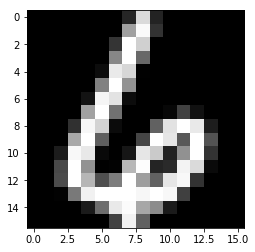

In [37]:
show_usps(dataxtraino[50])
plt.show()

In [32]:
def choice_class(datax, datay, classe1, classe2):
    dx = []
    dy = []
    for i in range(len(datay)):
        if(datay[i]==classe1):
            dx.append(datax[i])
            dy.append(1)
        elif(datay[i]==classe2):
            dx.append(datax[i])
            dy.append(-1)
    return dx, dy

In [33]:
dataxtrain, dataytrain = choice_class(dataxtraino, dataytraino, 6, 9)
dataxtest, dataytest = choice_class(dataxtesto, dataytesto, 6, 9)

In [34]:
svm = SVC(probability = True, kernel='linear')

svm.fit(dataxtrain, dataytrain)

print("train", svm.score(dataxtrain, dataytrain))
print("test", svm.score(dataxtest, dataytest))

train 1.0
test 0.99711815562


In [35]:
kernel = ['linear', 'poly', 'rbf']
C = [0.0001,0.001, 0.01, 0.1, 1, 5]

kernel linear


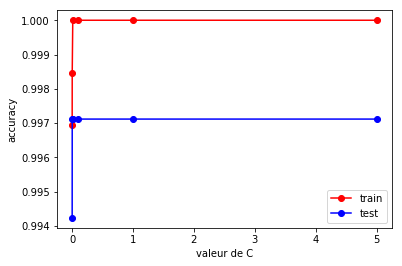

kernel poly


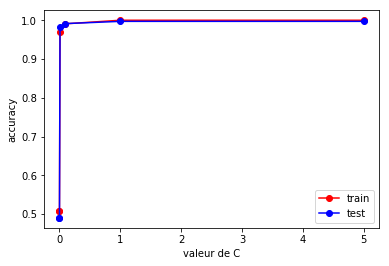

kernel rbf


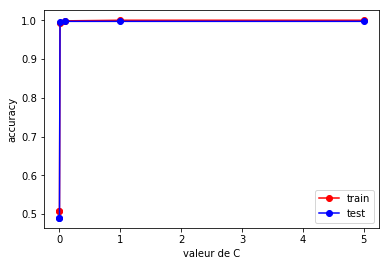

In [44]:
for k in kernel:
    sa = []
    st = []
    print("kernel", k)
    for c in C:
        svm = SVC(probability = True, kernel=k, C=c)

        svm.fit(dataxtrain, dataytrain)

        sa.append(svm.score(dataxtrain, dataytrain))
        st.append(svm.score(dataxtest, dataytest))
    plt.plot(C, sa, "ro-", label="train")
    plt.plot(C, st, "bo-", label="test")
    plt.ylabel("accuracy")
    plt.xlabel("valeur de C")
    plt.legend()
    plt.show()

On voit qu'un kernel linéaire n'est pas aussi bon que les autres kernels (gaussien et polynomial) ce qui est cohérent car les données ne sont pas parfaitement linéairement séparable. Et pour finir, que ce soit pour l'accuracy du train ou du test, on observe une nette augmentation à partir d'un C supérieur ou égal à 0,001.

### Apprentissage multi-classe

In [59]:
def fit_one_vs_one(trainx, trainy):
    svm = SVC(probability = True, kernel='linear')

    svm.fit(trainx, trainy)

    return svm

In [56]:
res_test = np.zeros((9,9))
res_test

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [86]:
def learn_all_classifier(trainxo, trainyo):
    svm = []
    maxi = max(trainyo)
    for i in range(maxi):
        tmp = []
        for j in range(0, maxi):  
            if (j>i):
                dataxtrain, dataytrain = choice_class(trainxo, trainyo, i, j)
                s = fit_one_vs_one(dataxtrain, dataytrain)
                tmp.append(s)
            else:
                tmp.append(0)
        svm.append(tmp)
    return svm

In [100]:
def predict(tx, svm):
    """tx : 1 exemple de la base de test
       svm : matrice de tous les classifier appris"""
    res_y = []
    for i in range(len(svm)):
        t = 0
        for j in range(len(svm[i])):
            if(i<j):
                t += svm[i][j].predict([tx])[0]
            elif(i>j):
                t -= svm[j][i].predict([tx])[0]
        res_y.append(t)
    return np.argmax(res_y)

In [69]:
def score(testx, testy, svm):
    res = 0
    
    for i in range(len(testx)):
        if(predict(testx[i], svm)==testy[i]):
            res += 1
    return 1.0*res/len(testy)    

In [103]:
def one_vs_one(trainx, trainy, testx, testy):
    svm = learn_all_classifier(trainx, trainy)
    
    return score(trainx, trainy, svm), score(testx, testy, svm)

In [104]:
sc_tr, sc_te = one_vs_one(dataxtraino, dataytraino, dataxtesto, dataytesto)
print("score train multi-label : ", sc_tr)
print("score test multi-label : ", sc_te)

score train multi-label :  0.911534768893156
score test multi-label :  0.8460388639760837
